<span style="font-size:larger;">**Final Examination - Take Home Test**</span>

<span style="font-size:larger;">*run a series of classification algorythm (about 5) and find the best algorythm among all.  Then you will run a multilayer perceptron on the same dataset and compare the performance. Here are some of the common steps you can use*</span>


- <span style="font-size:medium;">Data Cleaning</span>
- <span style="font-size:medium;">Data Correlation</span>
- <span style="font-size:medium;">Classification Algorithm (Choose the best out of 5)</span>
- <span style="font-size:medium;">Neural Network with MLP (Multilayer Perceptron) using scikit-learn MLP</span>
- <span style="font-size:medium;">Feature Extraction (Assess if it improves performance; note that sometimes it doesn't)</span>
- <span style="font-size:medium;">Confusion Matrix and Other Metrics for Classification</span>
- <span style="font-size:medium;">Compare the Models</span>


<span style="font-size:larger;">00. Import libraries and Dataset</span>

<span style="font-size:medium;">*For the dataset - you can pick any but for the sake of simplicity i would recommend using the wine dataset it had a boof number of features, and 3 classes as target.*</span>

<span style="font-size:medium;">***Example:***</span>
- <span style="font-size:smaller;">from sklearn.datasets import load_wine</span>
- <span style="font-size:smaller;">wine_data = load_wine()</span>
- <span style="font-size:smaller;">wine_df = pd.DataFrame(data=X, columns=wine_data.feature_names)</span>
- <span style="font-size:smaller;">wine_df['target'] = y</span>

In [172]:
#import all required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Using the wine dataset for simplicity)
from sklearn.datasets import load_wine

# Load dataset and create dataframe
wine = load_wine()
df = pd.DataFrame(
    wine.data, 
    columns=wine.feature_names
    )
df['target'] = pd.Series(wine.target)

df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


<span style="font-size:larger;">01. Data Cleaning</span>

In [173]:
#check for missing values
missing = df.isnull().sum()

#check for duplicate values
duplicate = df.duplicated().sum()

#print missing and duplicate values in a dataframe
print('Missing values: ', missing)
print('Duplicate values: ', duplicate)

Missing values:  alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
Duplicate values:  0


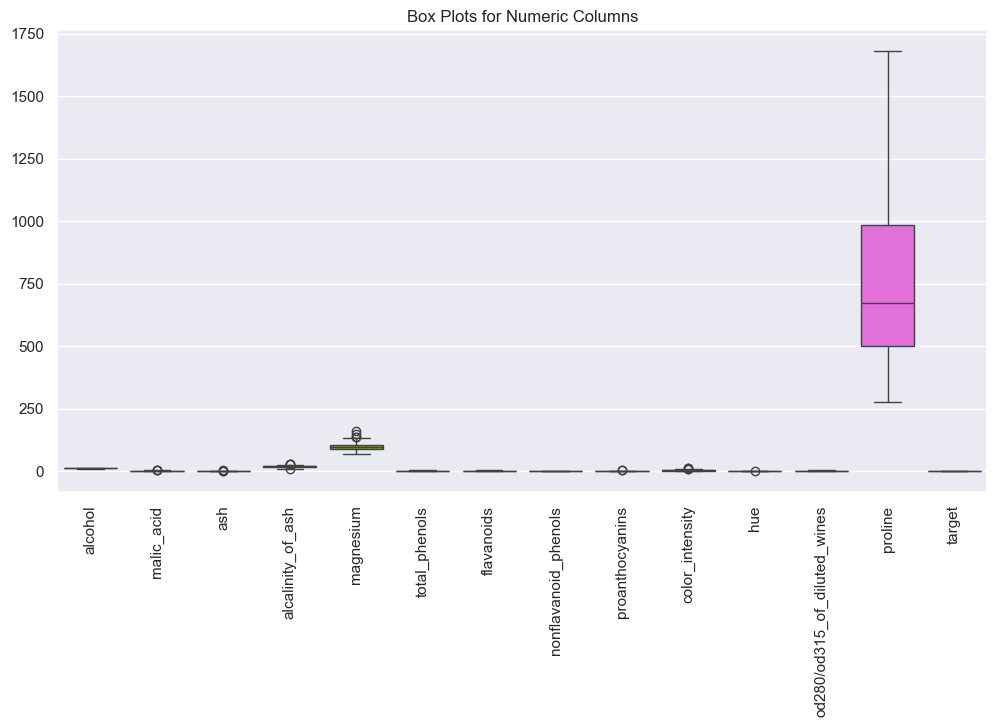

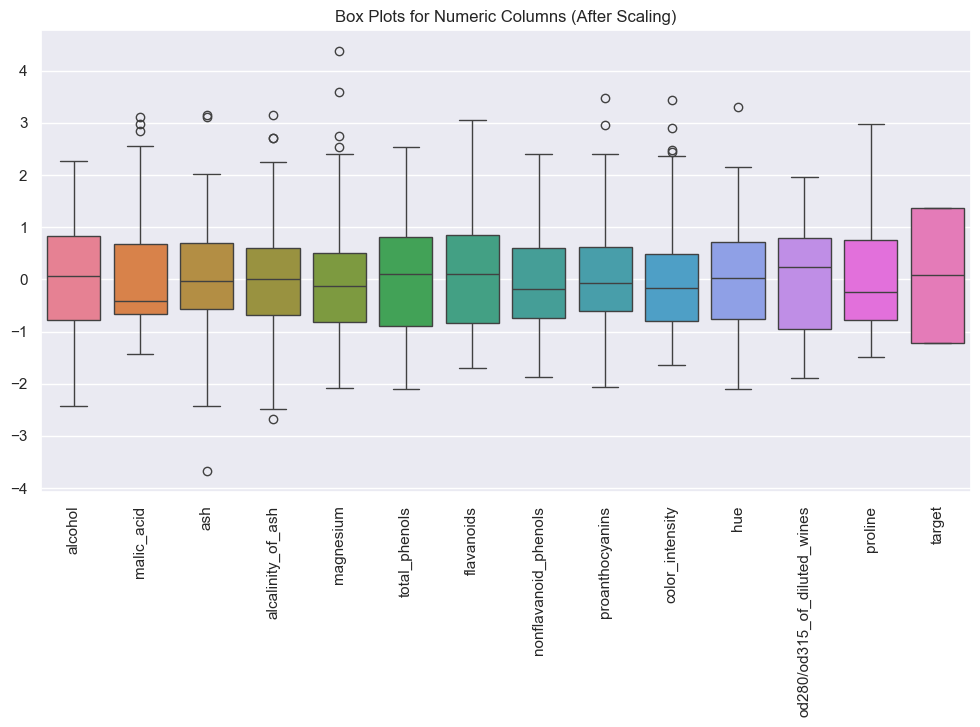

In [174]:
# Check Outliers or Class Imbalance

from scipy.stats import zscore

# Consider only numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Box plots to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.title('Box Plots for Numeric Columns')
plt.xticks(rotation=90)
plt.show()

#scale the boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns].apply(zscore))
plt.title('Box Plots for Numeric Columns (After Scaling)')
plt.xticks(rotation=90)
plt.show()

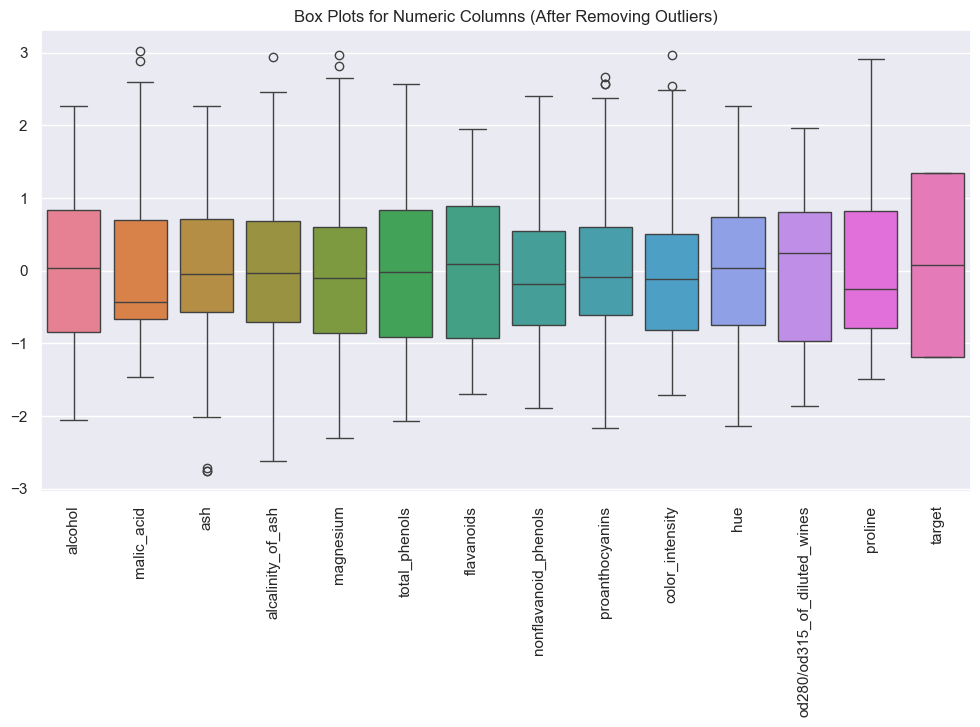

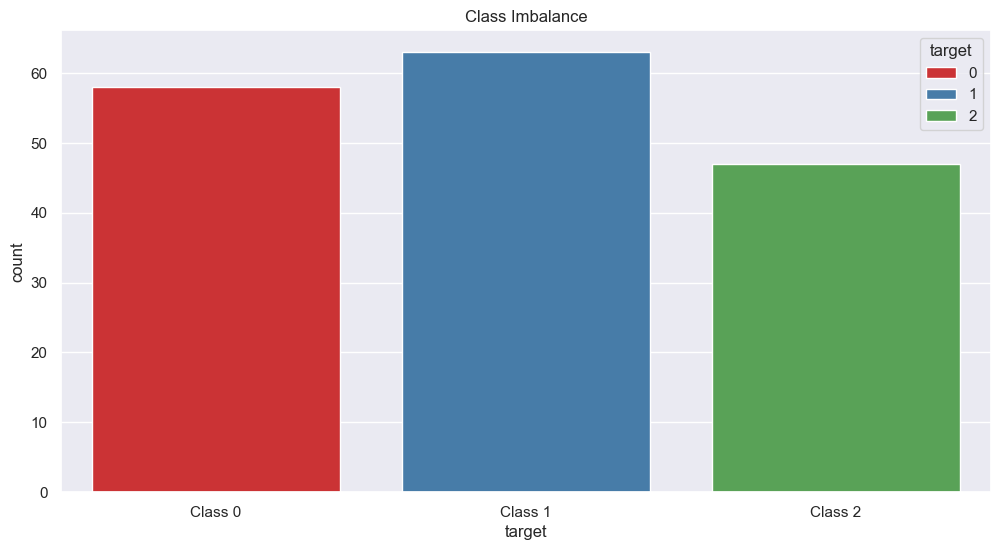

In [175]:
#remove outliers
df = df[(np.abs(zscore(df[numeric_columns])) < 3).all(axis=1)]

#check for outliers after removing them
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns].apply(zscore))
plt.title('Box Plots for Numeric Columns (After Removing Outliers)')
plt.xticks(rotation=90)
plt.show()

#count plot for target variable to check for class imbalance with class names
plt.figure(figsize=(12, 6))
sns.countplot(x='target', data=df, hue='target', palette='Set1')
plt.title('Class Imbalance')
plt.xticks(ticks=[0, 1, 2], labels=['Class 0', 'Class 1', 'Class 2'])
plt.show()

<span style="font-size:larger;">02. Data Correlation</span>

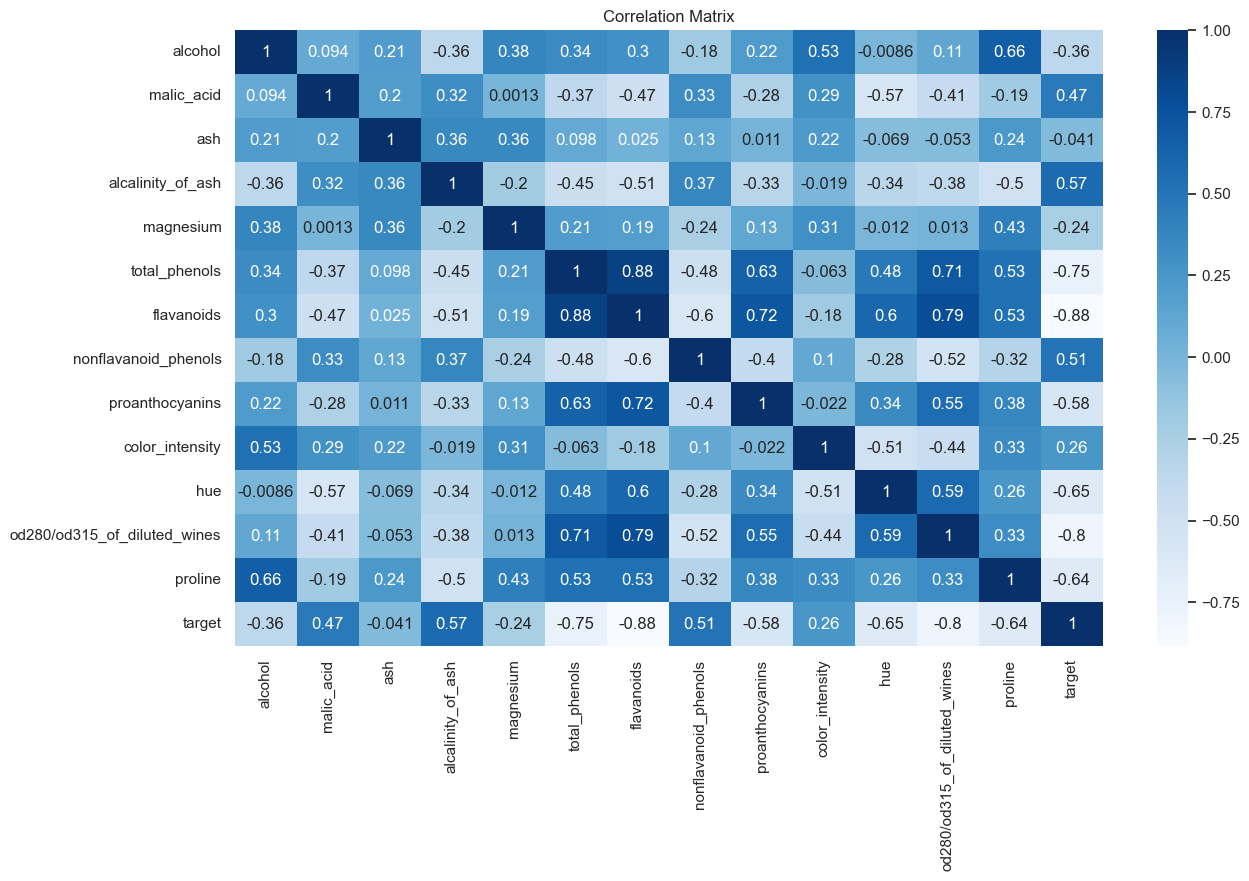

In [176]:
#Correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

<span style="font-size:larger;">03. Classification Algorithm (Choose the best out of 5)</span>

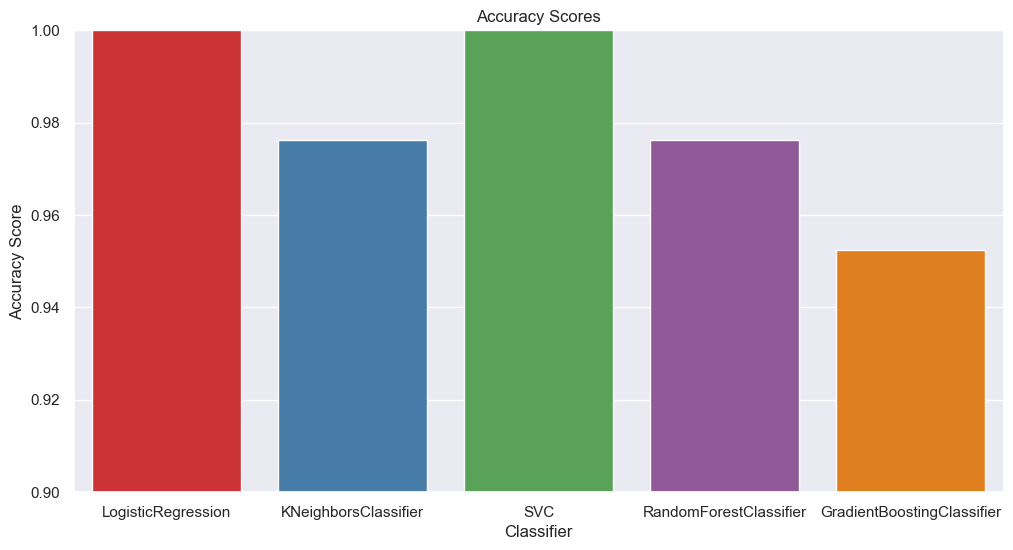

In [182]:
#split the dataset into train and test
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.25, 
    random_state=42
    )

#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#Calculate the accuracy score for 5 different classifiers without feature selection
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
    ]

#Compare the accuracy scores of the classifiers in a bar chart
scores = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(scaler.transform(X_test))
    scores.append(classifier.score(scaler.transform(X_test), y_test))

plt.figure(figsize=(12, 6))
sns.barplot(
    x=[classifier.__class__.__name__ for classifier in classifiers], 
    y=scores, 
    hue=[classifier.__class__.__name__ for classifier in classifiers], 
    palette='Set1')
plt.title('Accuracy Scores')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim(0.9, 1)
plt.show()


<span style="font-size:larger;">04. Neural Network with MLP (Multilayer Perceptron) using scikit-learn MLP</span>

In [189]:
#Calculate the accuracy score for Neural Network without feature selection
mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 25, 12), max_iter=300, random_state=100, learning_rate_init=0.001)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(scaler.transform(X_test))
print('Accuracy Score for Neural Network: ', mlp.score(scaler.transform(X_test), y_test))

Accuracy Score for Neural Network:  1.0


<span style="font-size:larger;">05. Feature Extraction (Assess if it improves performance; note that sometimes it doesn't)</span>

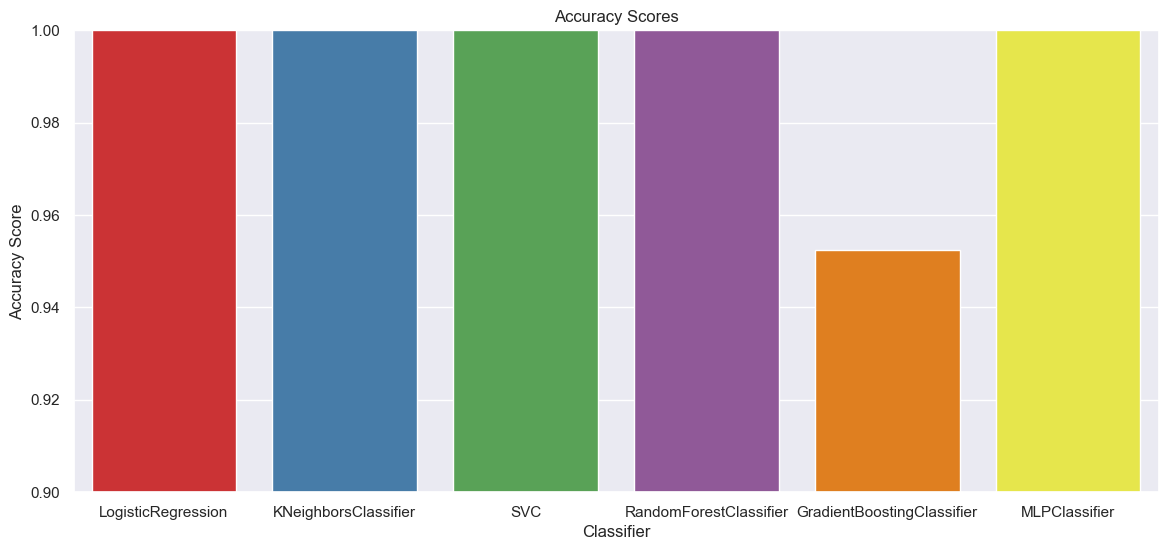

In [191]:
#Calculate the accuracy score for all classifiers with feature selection
#Select the top 5 features
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_new, 
    y, 
    test_size=0.25, 
    random_state=42
    )

#scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

#Calculate the accuracy score for 5 different classifiers and MLP classifier with feature selection
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier(hidden_layer_sizes=(100, 50, 25, 12), max_iter=300, random_state=100, learning_rate_init=0.001)
    ]

#Compare the accuracy scores of the classifiers in a bar chart
scores = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(scaler.transform(X_test))
    scores.append(classifier.score(scaler.transform(X_test), y_test))

plt.figure(figsize=(14, 6))
sns.barplot(
    x=[classifier.__class__.__name__ for classifier in classifiers], 
    y=scores, 
    hue=[classifier.__class__.__name__ for classifier in classifiers], 
    palette='Set1')
plt.title('Accuracy Scores')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim(0.9, 1)
plt.show()

<span style="font-size:larger;">06. Confusion Matrix and Other Metrics for Classification</span>

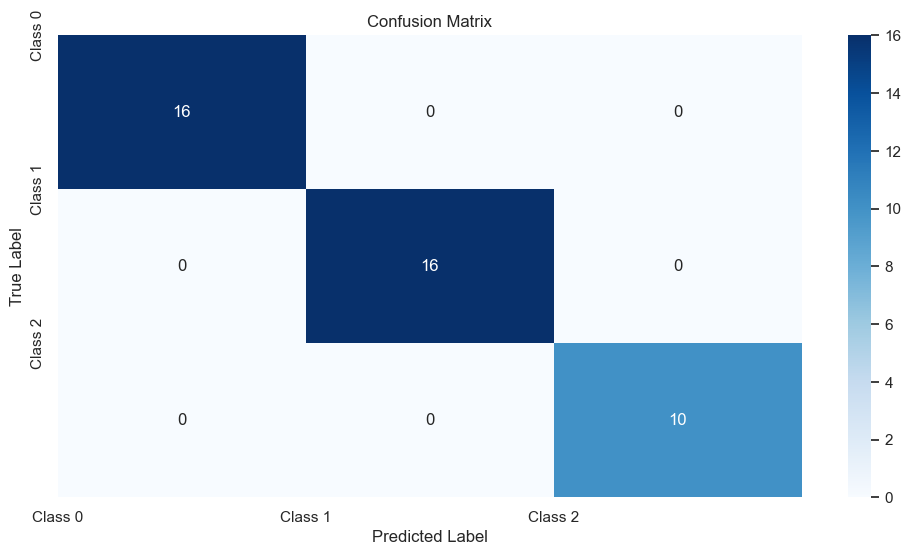

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        10

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



In [197]:
#Confusion matrix for MLP classifier
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xticks(ticks=[0, 1, 2], labels=['Class 0', 'Class 1', 'Class 2'])
plt.yticks(ticks=[0, 1, 2], labels=['Class 0', 'Class 1', 'Class 2'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#Classification report for MLP classifier
print(classification_report(y_test, y_pred))

<span style="font-size:larger;">07. Compare the Models</span>

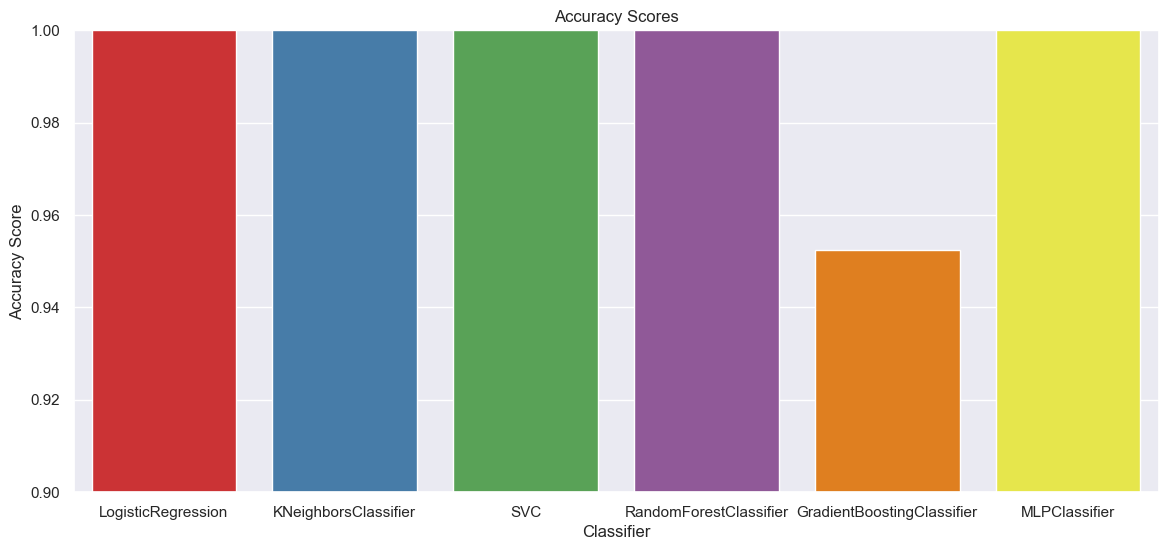

In [195]:
#Compare the accuracy scores of the classifiers in a bar chart
scores = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(scaler.transform(X_test))
    scores.append(classifier.score(scaler.transform(X_test), y_test))

plt.figure(figsize=(14, 6))
sns.barplot(
    x=[classifier.__class__.__name__ for classifier in classifiers], 
    y=scores, 
    hue=[classifier.__class__.__name__ for classifier in classifiers], 
    palette='Set1')
plt.title('Accuracy Scores')
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.ylim(0.9, 1)
plt.show()